In [1]:
!apt-get -qq install -y graphviz && pip install -q pydot
!pip install graphviz
!pip install pydot

In [0]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from matplotlib import pyplot
from matplotlib import pylab
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#some new tricks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from pydot import graph_from_dot_data

In [0]:
data = datasets.load_iris()

In [0]:
iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [0]:
train_df, test_df= train_test_split(iris_df, random_state=1)

In [6]:
tree = DecisionTreeClassifier()
#tree.criterion = 'entropy'
tree.fit(train_df.drop('target', axis=1), train_df['target'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
help(tree)

Help on DecisionTreeClassifier in module sklearn.tree.tree object:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int or None, optional (default=None)
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int, float, optional (default=2

In [8]:
sum(tree.predict(test_df.drop('target',axis=1))==test_df['target'])

37

In [9]:
confusion_matrix(tree.predict(test_df.drop('target',axis=1)),test_df['target'])

array([[13,  0,  0],
       [ 0, 15,  0],
       [ 0,  1,  9]])

In [10]:
tree.feature_importances_

array([0.        , 0.03358119, 0.08035985, 0.88605896])

In [11]:
!pip install pydotplus

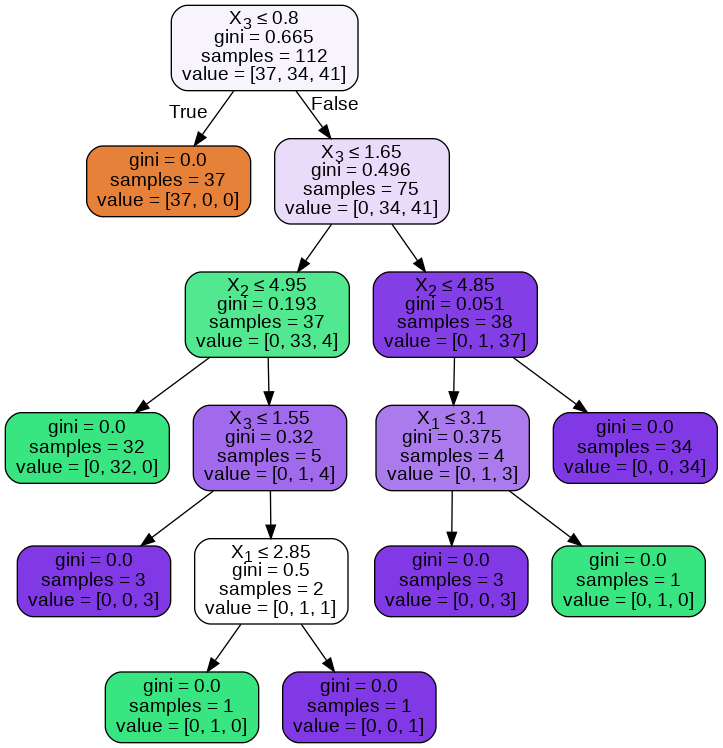

In [12]:
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  

path=StringIO()
export_graphviz(tree, out_file=path,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(path.getvalue())
Image(graph.create_png())

In [13]:
mat=tree.decision_path(test_df.iloc[4].drop('target').values.reshape(1,-1))
print(test_df.iloc[4].drop('target'))
print(mat)

sepal length (cm)    7.9
sepal width (cm)     3.8
petal length (cm)    6.4
petal width (cm)     2.0
Name: 131, dtype: float64
  (0, 0)	1
  (0, 2)	1
  (0, 10)	1
  (0, 14)	1


In [14]:
tree.predict(test_df.drop('target',axis=1))==test_df['target']

14      True
98      True
75      True
16      True
131     True
56      True
141     True
44      True
29      True
120     True
94      True
5       True
102     True
51      True
78      True
42      True
92      True
66      True
31      True
35      True
90      True
84      True
77     False
40      True
125     True
99      True
33      True
19      True
73      True
146     True
91      True
135     True
69      True
128     True
114     True
48      True
53      True
28      True
Name: target, dtype: bool

In [15]:
tree.predict_proba(test_df.iloc[21:27].drop('target',axis=1))

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [16]:
lr = LogisticRegression()
lr.fit(train_df.drop('target', axis=1), train_df['target'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
sum(lr.predict(test_df.drop('target',axis=1))==test_df['target'])

32

In [18]:
confusion_matrix(lr.predict(test_df.drop('target',axis=1)),test_df['target'])

array([[13,  0,  0],
       [ 0, 10,  0],
       [ 0,  6,  9]])

In [19]:
lr.predict_proba(test_df.iloc[4].drop('target').values.reshape(1,-1))

array([[0.00108168, 0.28123795, 0.71768037]])

In [0]:
data = datasets.load_boston()
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
housing_train_df, housing_test_df = train_test_split(housing_df, random_state=1)

In [21]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_train_df.drop('target',axis=1),housing_train_df['target'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
mean_squared_error(tree_reg.predict(housing_train_df.drop('target',axis=1)), housing_train_df['target'])

0.0

In [23]:
mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])

24.791338582677167

In [24]:
tree_reg.score(housing_test_df.drop('target',axis=1), housing_test_df['target'])

0.7497302583768866

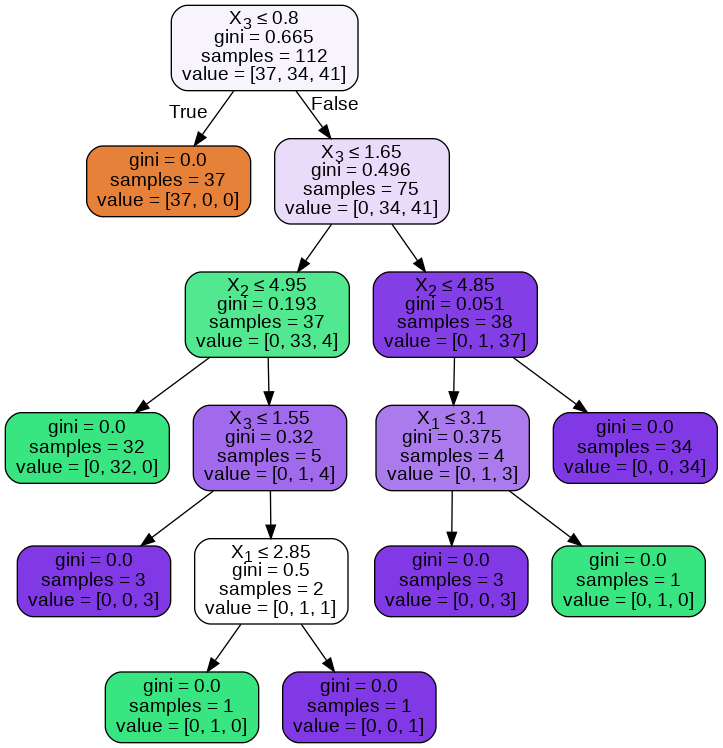

In [25]:
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  

path=StringIO()
export_graphviz(tree, out_file=path,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(path.getvalue())
Image(graph.create_png())

# Homework:

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the data set.
- train a logistic regression model on the data set
- train a KNN (K=3) model on the data set
- Which model performed better?
- Which features were most relevant in each model?

In [26]:
data=datasets.load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f